In [66]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [67]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [68]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.176044,-1.214934,3.384392,-1.855407,3.748759,1
1,1.492425,-1.597406,0.581619,1.564533,0.605825,1
2,0.062330,0.691009,0.199286,-1.303668,-1.870993,0
3,-0.296171,-2.575571,-0.252612,-1.149529,0.541121,0
4,0.462776,-1.169028,2.139103,-0.234449,1.224625,1


In [71]:
## Function for Row Sampling
# Percent --> How many % of total rows randomly we want as our dataset

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [72]:
# Example

sample_rows(df,0.1)

,col1,col2,col3,col4,col5,target
75,2.116157,-0.141081,3.533259,-0.457136,2.633657,1
19,0.516403,-1.388273,2.452516,-1.302085,2.039635,1
15,2.853192,-1.853201,1.816534,0.746426,2.062484,1
78,-0.176632,-0.043693,0.538620,0.921112,1.006900,1
21,0.787796,-2.846912,-0.165574,-1.058855,-0.916917,0
3,-0.296171,-2.575571,-0.252612,-1.149529,0.541121,0
84,1.891976,-1.606165,1.007500,1.015884,1.597370,1
30,0.330188,-1.289709,1.047838,1.217636,0.172348,1
66,0.519895,-0.385191,0.395660,1.884508,0.072991,1
76,0.543348,0.024839,1.456139,-1.372132,-0.473518,0


In [73]:
## Function for Feature (Col) Sampling

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [74]:
# Example

sample_features(df,0.5)

<ipython-input-73-aa64f5ef477a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col4,col2,target
0,-1.855407,-1.214934,1
1,1.564533,-1.597406,1
2,-1.303668,0.691009,0
3,-1.149529,-2.575571,0
4,-0.234449,-1.169028,1
...,...,...,...
95,-0.576357,-0.016917,0
96,-1.134873,1.760661,0
97,2.608279,-0.904869,1
98,-0.385232,-1.682926,0


In [75]:
## Function for Combined Sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [76]:
# Example

combined_sampling(df,0.2,0.6)

<ipython-input-73-aa64f5ef477a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col1,col4,col2,target
65,-0.073903,-0.960399,-1.535826,0
25,1.911057,2.635791,-1.896693,1
2,0.062330,-1.303668,0.691009,0
6,1.927168,3.709489,-2.801410,1
98,1.755807,-0.385232,-1.682926,0
44,-0.302429,-0.617168,-2.554587,0
88,-0.380539,3.981347,0.171823,1
92,1.092289,-0.726581,-2.014536,0
2,0.062330,-1.303668,0.691009,0
28,-0.804974,1.674914,0.608324,1


### Applying Random Forest

##### making datasets using bootstrapping

In [80]:
X = df.iloc[:, :5]
y = df.iloc[:,-1]

In [78]:
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,col1,col2,col3,col4,col5
55,-0.224799,-0.596816,-1.003864,-1.186802,-1.411455
88,-0.380539,0.171823,-0.891967,3.981347,-2.008996
26,-1.690281,0.851310,-0.180247,1.972725,-0.354102
42,1.257540,-1.274236,1.387016,-1.018936,-0.902811
69,-0.549835,2.038351,0.024871,2.505737,0.611866
...,...,...,...,...,...
60,-0.527659,-0.547592,-0.239258,-1.167865,-0.173343
71,0.974187,-1.347256,1.796671,-0.784625,-0.365780
14,0.522729,-1.188870,2.169386,0.696193,0.027356
92,1.092289,-2.014536,1.561842,-0.726581,-0.270991


In [79]:
df1 = combined_sampling(df,0.5,0.6)
df1

<ipython-input-73-aa64f5ef477a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col1,col4,target
55,-1.411455,-0.224799,-1.186802,0
44,0.594212,-0.302429,-0.617168,0
1,0.605825,1.492425,1.564533,1
90,1.794371,-2.015025,-0.317279,0
10,0.374309,-1.409072,-1.360935,0
59,0.868806,-0.471999,-1.306154,0
43,-2.272814,2.940057,-0.327693,0
45,2.318835,2.163966,-0.118511,1
54,-1.370211,2.407834,-0.346671,0
4,1.224625,0.462776,-0.234449,1


In [23]:
df2 = combined_sampling(df,0.5,0.6)
df2

<ipython-input-9-aa64f5ef477a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col5,col1,col3,target
61,-2.200866,1.967882,-0.438472,0
57,1.052475,1.746457,-2.380058,0
70,-1.308120,0.958452,-1.159571,0
46,-0.069430,0.095699,0.161002,1
6,2.738742,-0.066410,0.643571,1
91,0.702688,1.628072,1.503253,1
55,0.551822,1.011179,0.735518,1
87,1.238969,0.672569,0.451179,1
27,-0.189031,3.408410,1.673975,1
72,0.183752,2.338301,0.219382,0


In [22]:
df3 = combined_sampling(df,0.5,0.6)
df3

<ipython-input-9-aa64f5ef477a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


,col2,col3,col4,target
77,1.386568,2.543509,0.834981,1
13,-0.250223,0.299760,1.032877,0
23,-1.953504,-1.762568,-2.897376,0
51,1.169051,1.777475,1.571562,1
69,1.253988,1.329728,2.426518,1
35,2.130663,0.912370,-2.670900,1
99,0.859383,-1.633837,1.349011,0
24,-2.465405,-0.230381,-4.531179,0
5,-0.711505,-0.974346,-0.714988,0
67,0.619031,2.187363,0.305957,1


In [25]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col1', 'col2', 'col3', 'target'], dtype='object')
Index(['col5', 'col1', 'col3', 'target'], dtype='object')
Index(['col2', 'col3', 'col4', 'target'], dtype='object')


##### training 3 models on above data

In [26]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [30]:
clf1.fit(df1.iloc[:,0:3],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:3],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:3],df3.iloc[:,-1])

DecisionTreeClassifier()

In [31]:
# Plotting all Decision Trees

from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[2] <= 0.316\ngini = 0.48\nsamples = 50\nvalue = [30, 20]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.6, 0.5, 'x[1] <= -1.454\ngini = 0.32\nsamples = 25\nvalue = [5, 20]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

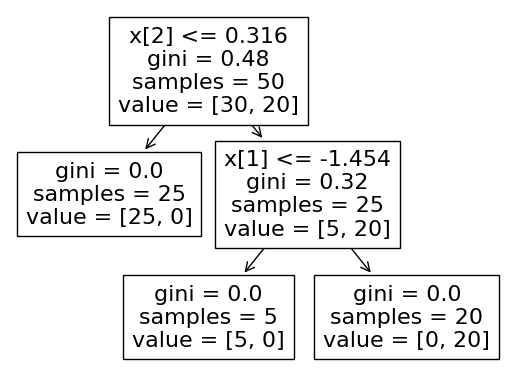

In [32]:
plot_tree(clf1)

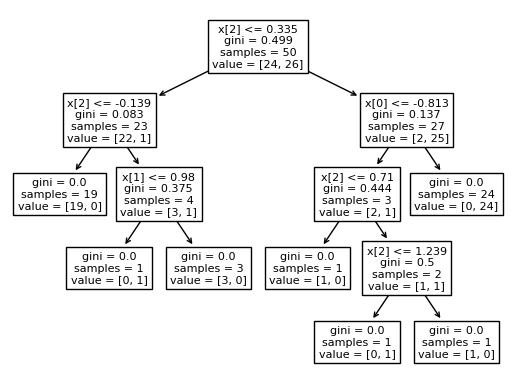

In [38]:
plot_tree(clf2)
plt.show()

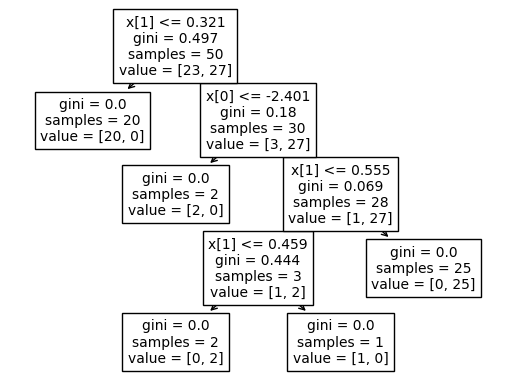

In [37]:
plot_tree(clf3)
plt.show()

##### finding prediction of query = [3.086165,	1.810503,	2.017469] by giving this query into every previously trained model & considering Majority Count to get is final predection (AGGREGATION)

In [44]:
clf1.predict(np.array([3.086165,	1.810503,	2.017469]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [46]:
clf2.predict(np.array([3.086165,	1.810503,	2.017469]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [45]:
clf3.predict(np.array([3.086165,	1.810503,	2.017469]).reshape(1,3))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])